You need to download the jupyterthemes and uncertainties packages. The former is for the theme, latter for uncertainty calculations <br>
Use the following for installing: <br>
pip install jupyterthemes <br>
pip install uncertainties

In [1]:
import jupyterthemes as jt
jt.get_themes()

['chesterish',
 'grade3',
 'gruvboxd',
 'gruvboxl',
 'monokai',
 'oceans16',
 'onedork',
 'solarizedd',
 'solarizedl']

In [2]:
# https://towardsdatascience.com/customize-your-jupyter-notebook-theme-in-2-lines-of-code-fc726cea1513
# !jt -t onedork -f fira -fs 13 -nf ptsans -nfs 11 -N -kl -cursw 5 -cursc r -cellw 95% -T
# !jt -r
!jt -t grade3 -T -N -kl -cursc r -cellw 90%
jt.jtplot.style()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from scipy.optimize import curve_fit
import astropy.units as u
import pandas as pd
from uncertainties import ufloat
import scipy.stats as stats
from uncertainties import ufloat
import matplotlib.ticker as mticker  

In [4]:
mu0 = 1.25663706212*10**-6

In [5]:
current = np.arange(0.5,0.95,0.05)
mass0 = np.array([.570, .553, .532, .514, .490, .474, .453, .432, .413])
errcurrent = np.ones(9)*0.01
errmass = np.ones(9) *0.001
deltac = np.ones(9)*0.05
deltam = mass0 - 180.786

m = (-3.96+/-0.04)e-01
b = (-1.80+/-0.00)e+02


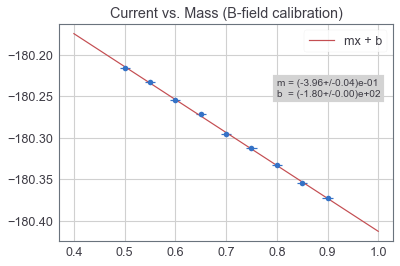

In [6]:
func = lambda x, a, b: a*x +b
xlin = np.linspace(.4,1,100)

popt, pcov = curve_fit(func, current, deltam, sigma = errcurrent, p0=None)

sigma = np.sqrt(0.01**2 + (0.001)**2)*np.ones(len(current))
(bparam,bcov) = np.polyfit(current,deltam,1,w=1/sigma,cov=True)
bfitp = np.poly1d(bparam)
byfit = bfitp(current)
bchi = np.sum(((deltam - byfit)/errcurrent)**2)
bdof = len(current) - len(bparam)
bredchi = bchi/bdof
bp_value = 1 - stats.chi2.cdf(bchi, df=bdof)
m = ufloat(bparam[0],np.sqrt(bcov[0,0]))
b = ufloat(bparam[1],np.sqrt(bcov[1,1]))
print(f"m = {m:.2e}\nb = {b:.2e}")

plt.errorbar(current,deltam,yerr=errmass,xerr=errcurrent,fmt='o')
plt.text(0.8, -180.250,f"m = {m:.2e}\nb  = {b:.2e}",backgroundcolor="lightgrey")
# plt.scatter(current,deltam)
plt.plot(xlin, func(xlin, *popt), 'r', label=f"mx + b")
plt.title("Current vs. Mass (B-field calibration)")
plt.legend()
plt.grid(True)
plt.savefig("cali_B_plot.png")
plt.show()

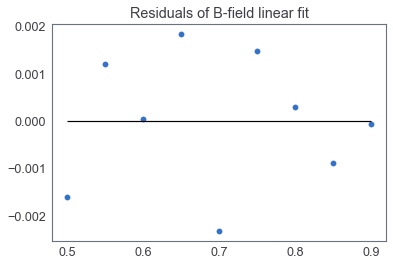

In [7]:
resid = deltam-func(current, *popt)
plt.scatter(current,resid)
plt.hlines(0,0.5,0.9,"black")
plt.grid(False)
plt.title("Residuals of B-field linear fit")
plt.savefig("cali_B_plot_resid.png")
plt.show()

We were having an issue finding the gravitational acceleration to use, so we have just asked the Wolfram Alpha database: <br>
$g = 9.8026 \frac{m}{s^2}$ <br>
We couldn't find the error, so we will assume $+/- 0.01 \frac{m}{s^2}$

In [8]:
g = ufloat(9.8026, 0.01)
Bslope = ufloat(popt[0],np.sqrt(bcov[0,0]))

B=-1*(Bslope*(g)/0.01)/1000
print(B)

0.389+/-0.004


In [9]:
data = pd.read_csv("lab01_data.csv")
# online data via wiki, to be checked later

In [10]:
data['high diff'] = data['high(g)'] - data['init']
data['low diff'] = data['low(g)'] - data['init']
data['high/low diff diff'] = data['high diff']-data['low diff']
data['high/low diff diff avg'] = data['high/low diff diff']/2
data["our classification"] = None
init_mass = data['mass(g)'][data['name'] == " empty vial"]
data['mass'] = data["mass(g)"] - float(init_mass)

In [11]:
# #Don't think this is working since the elements are type np.float64
# data["low(g)"] *= u.g
# data["high(g)"] *= u.g
# data["far(g)"] *= u.g
# data["init"] *= u.g
# data["mass(g)"] *= u.g
# data["mass"] *= u.g
# data["height(cm)"] *= u.cm
# data["high diff"] *= u.g
# data["low diff"] *= u.g|
# data["high/low diff diff"] *= u.g
# data["online chi(cm3/mol)"] *= (u.cm)**3/u.mol

If High diff is positive and Low diff negative: then the sample alligns with the B field and is pulling it up, thus paramagnet
If High diff is negative and Low diff positive: then the sample anti-alligns with the B field and is pushing down, thus diamagnet
If High diff and Low diff have the same sign then the field doesn't effect the magnetization and it is a ferromagnet

Looking over it manually (cause coding that part was annoying) the classifcations were added. 

In [12]:
data.loc[data["name"] == " copper", "our classification"] = "dia"
data.loc[data["name"] == " aluminum", "our classification"] = "para"
data.loc[data["name"] == " titanium", "our classification"] = "para"
data.loc[data["name"] == " bismuth", "our classification"] = "dia"
data.loc[data["name"] == " colbalt wire", "our classification"] = "para"
data.loc[data["name"] == " pyrolytic graphite", "our classification"] = "dia"
data.loc[data["name"] == " neodymium choride hexahydrate", "our classification"] = "para"
data.loc[data["name"] == " gadolinium oxide", "our classification"] = "ferro"
data.loc[data["name"] == " erbium oxide", "our classification"] = "ferro"
data.loc[data["name"] == " mohrs salt", "our classification"] = "ferro"
data.loc[data["name"] == " irom alum", "our classification"] = "ferro"
data.loc[data["name"] == " blue vitriol", "our classification"] = "para"
data.loc[data["name"] == " copper acetate", "our classification"] = "para"
data.loc[data["name"] == " manganese oxide", "our classification"] = "ferro"
data.loc[data["name"] == " manganese choride tetrahydrate", "our classification"] = "dia"
data.loc[data["name"] == " nickel-zinc ferrite", "our classification"] = "para"
data.loc[data["name"] == " empty vial", "our classification"] = "dia"
data.loc[data["name"] == " iodized salt", "our classification"] = "dia"
data.loc[data["name"] == " himalanan salt", "our classification"] = "dia"
data.loc[data["name"] == " Rust on paper", "our classification"] = "ferro"

In [13]:
data # printing out our data to be read

,sample,name,low(g),high(g),far(g),init,online classification,online chi(cm3/mol),height(cm),mass(g),type,molar mass,high diff,low diff,high/low diff diff,high/low diff diff avg,our classification,mass
0,1,copper,180.764,180.782,180.772,NaN,dia,-0.000005,3.20,28.163,solid,63.546000,NaN,NaN,NaN,NaN,dia,25.221
1,2,aluminum,180.779,180.762,180.772,NaN,para,0.000017,3.00,10.619,solid,26.981539,NaN,NaN,NaN,NaN,para,7.677
2,3,titanium,180.874,180.656,180.772,NaN,para,0.000153,3.00,15.890,solid,47.867000,NaN,NaN,NaN,NaN,para,12.948
3,4,bismuth,180.701,180.842,180.772,NaN,dia,-0.000280,3.30,21.187,non-solid,208.980400,NaN,NaN,NaN,NaN,dia,18.245
4,5,colbalt wire,180.941,180.579,180.771,NaN,ferro,NaN,3.20,3.206,solid,58.933195,NaN,NaN,NaN,NaN,para,0.264
5,6,pyrolytic graphite,180.705,180.841,180.771,180.772,NaN,NaN,3.20,4.090,solid,12.011000,0.069,-0.067,0.136,0.0680,dia,1.148
6,7,neodymium choride hexahydrate,180.939,180.585,180.772,180.772,para,NaN,3.10,7.514,non-solid,358.692700,-0.187,0.167,-0.354,-0.1770,para,4.572
7,8,gadolinium oxide,180.155,180.403,180.768,180.774,NaN,0.053200,3.40,9.378,non-solid,362.498200,-0.371,-0.619,0.248,0.1240,ferro,6.436
8,9,erbium oxide,180.480,180.465,180.767,180.773,NaN,0.073920,3.35,12.247,non-solid,382.516200,-0.308,-0.293,-0.015,-0.0075,ferro,9.305
9,10,mohrs salt,180.035,180.426,180.774,180.773,NaN,NaN,3.20,6.427,non-solid,392.130000,-0.347,-0.738,0.391,0.1955,ferro,3.485


## Calculating the $\chi_m$

In [14]:
area = 1*1*u.cm**2
mu0 = 1.25663706212*10**-6 *u.H/u.m
g = 9.8*u.m/u.s**2
print(holder := mu0*g/(area*u.T**2))
print(f"{holder.decompose().to(1/u.g):e}")

mu0 = 1.25663706212*10**-6
area = 1*1
g = ufloat(9.8026, 0.01)

1.2315043208776e-05 H / (cm2 s2 T2)
1.231504e-04 1 / g


In [15]:
data["our chi"] = -10*(data['high/low diff diff avg']*(ufloat(2,np.sqrt(0.001**2+0.001**2)/2))*mu0*g/(area*B**2))/(2*np.pi)
data["diff"] = (data["online chi(cm3/mol)"] - data["our chi"])/data["online chi(cm3/mol)"]

# calculating volume
data["volume"] = data["height(cm)"] * 1*1
data["our chi molar"] = data["our chi"]*data["molar mass"]*data["volume"]/data["mass(g)"]

# data["online chi(cm3/mol)"] *= 10**6
# data["our chi"] *= 10**6
# data["our chi molar"] *= 10**6

In [32]:
data["percent chi molar diff"] = 100*((data["online chi(cm3/mol)"])-(data["our chi molar"]))/(data["online chi(cm3/mol)"])

In [34]:
data.loc[data["name"] == " colbalt wire", "volume"] *= np.pi*((127*10**-4)/2)**2
print(data["volume"][data["name"] == " colbalt wire"])

4     6.504920e-12
21    6.504920e-12
25    6.504920e-12
Name: volume, dtype: float64


In [35]:
rows = [5,6,7,8,9,10,11,12,13,14,17,18,19,20,21,22,23,24]
classifcation = data[["sample","name","our classification","online classification","our chi molar","online chi(cm3/mol)","percent chi molar diff"]]
classifcation = classifcation.iloc[rows]
classifcation.loc[data["name"] == " copper", "sample"] = 1
classifcation.loc[data["name"] == " aluminum", "sample"] = 2
classifcation.loc[data["name"] == " titanium", "sample"] = 3
classifcation.loc[data["name"] == " bismuth", "sample"] = 4
classifcation.loc[data["name"] == " colbalt wire", "sample"] = 5
classifcation.loc[data["name"] == " nickel-zinc ferrite", "sample"] = 16
classifcation.loc[data["name"] == " iodized salt", "sample"] = 17
classifcation.loc[data["name"] == " himalanan salt", "sample"] = 18
classifcation[["sample"]] = classifcation[["sample"]].apply(pd.to_numeric)
classifcation.sort_values(by="sample", inplace=True)
classification = classifcation.copy()
classifcation.to_csv("classifications.csv", index=False)


In [36]:
print(np.max(classifcation["online chi(cm3/mol)"]))
classifcation

0.07392


,sample,name,our classification,online classification,our chi molar,online chi(cm3/mol),percent chi molar diff
17,1,copper,dia,dia,(-1.88+/-0.04)e-05,-0.000005,-244+/-7
18,2,aluminum,para,para,(1.683+/-0.033)e-05,0.000017,-2.0+/-2.0
19,3,titanium,para,para,0.000261+/-0.000005,0.000153,-70.3+/-3.4
20,4,bismuth,dia,dia,-0.000588+/-0.000012,-0.000280,-110+/-4
21,5,colbalt wire,para,ferro,0.00273+/-0.00005,NaN,nan+/-nan
5,6,pyrolytic graphite,dia,NaN,-0.0001660+/-0.0000033,NaN,nan+/-nan
6,7,neodymium choride hexahydrate,para,para,0.00680+/-0.00013,NaN,nan+/-nan
7,8,gadolinium oxide,ferro,NaN,-0.00423+/-0.00008,0.053200,107.96+/-0.16
8,9,erbium oxide,ferro,NaN,0.000204+/-0.000004,0.073920,99.724+/-0.005
9,10,mohrs salt,ferro,NaN,-0.00992+/-0.00020,NaN,nan+/-nan


## Linearality of B-field
Finding the linearality of the B-field for a dia-, para-, and ferro- magnet

In [20]:
para_lin = pd.read_csv("lab01_al_linearity.csv")
dia_lin = pd.read_csv("lab01_cu_linearity.csv")
ferro_lin = pd.read_csv("lab01_co_linearity.csv")
para_lin["mass"] -= .758
dia_lin["mass"] -= .760
ferro_lin["mass"] -= .765
h_scale = 0.635 #make the height in mm

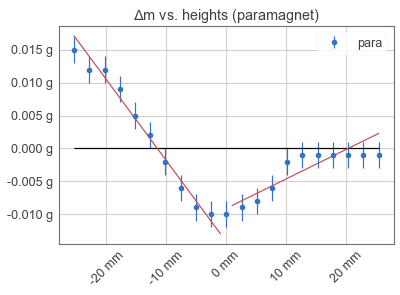

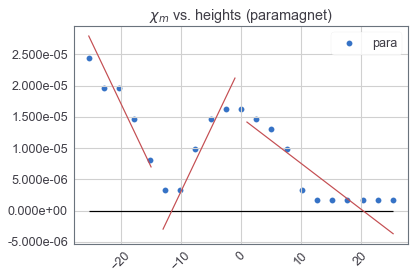

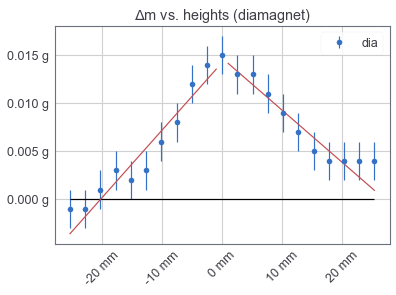

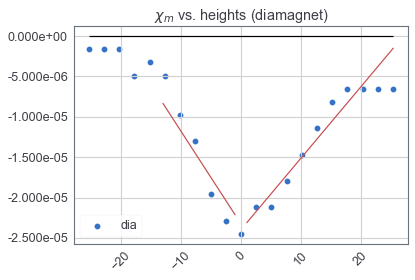

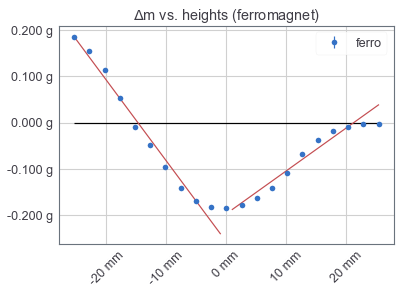

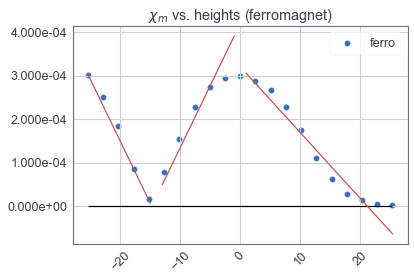

In [21]:
func = lambda x, a, b: a*x +b
xlin1 = np.linspace(-40*h_scale,-15,100)
xlin2 = np.linspace(-13,-1,100)
xlin3 = np.linspace(1,40*h_scale,100)
xlin4 = np.linspace(-40*h_scale,-1,100)


def linear_B_test(arr, name):
    heights = h_scale*arr['rotations']
    mass = arr['mass']
    
    # plotting delta m with linear fit
    popt1, pcov1 = curve_fit(func, heights[11:-1], mass[11:-1], p0=None)
    popt2, pcov2 = curve_fit(func, heights[0:10], mass[0:10], p0=None)
    yer = 0.002*np.ones(len(heights))
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f g'))
    plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f mm'))
    plt.xticks(rotation=45)
    plt.errorbar(heights,mass,yerr=yer,label=name,fmt='o')
    plt.plot(xlin4, func(xlin4, *popt1), 'r')
    plt.plot(xlin3, func(xlin3, *popt2), 'r')
    plt.hlines(0,-40*h_scale,40*h_scale,color="black")
    plt.legend()
    plt.title(r"$\Delta$m vs. heights (" + name + "magnet)")
    plt.savefig(name + "_linearity.png")
    plt.show()
    
    # plotting chi m with linear fit
    chis = -10*(arr['mass']*2*mu0*g.n/(area*B.n**2))
    popt1, pcov1 = curve_fit(func, heights[11:-1], chis[11:-1], p0=None)
    popt2, pcov2 = curve_fit(func, heights[0:10], chis[0:10], p0=None)
    yer = (-10*(ufloat(1,0.001)+ufloat(1,0.001))*2*g/(B.n**2)).s *np.ones(len(arr['mass']))
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3e'))
    plt.xticks(rotation=45)
    plt.scatter(heights,-np.abs(chis) if name == "dia" else np.abs(chis),label=name)
    if name != "dia":
        plt.plot(xlin1, -func(xlin1, *popt1), 'r')
    plt.plot(xlin2, func(xlin2, *popt1), 'r')
    plt.plot(xlin3, func(xlin3, *popt2), 'r')
    plt.hlines(0,-40*h_scale,40*h_scale,color="black")
    plt.legend()
    plt.title(r"$\chi_m$ vs. heights (" + name + "magnet)")
    plt.savefig(name + "_linearity_chi.png")
    plt.show()
    return

linear_B_test(para_lin, "para")
linear_B_test(dia_lin, "dia")
linear_B_test(ferro_lin, "ferro")

# references for molar masses
https://www.webqc.org/molecular-weight-of-Cu.html <br>
https://www.webqc.org/molecular-weight-of-Al.html <br>
https://www.webqc.org/molecular-weight-of-titanium.html <br>
https://www.webqc.org/molecular-weight-of-bismuth.html <br>
https://www.webqc.org/molecular-weight-of-cobalt.html <br>
https://www.alfa-chemistry.com/product/pyrolytic-graphite-powder-cas-7782-42-5-282338.html <br>
http://www.endmemo.com/chem/compound/ndcl36h2o.php <br>
https://www.convertunits.com/molarmass/Gadolinium(III)+Oxide <br>
https://www.convertunits.com/molarmass/Erbium(III)+Oxide <br>
https://byjus.com/chemistry/mohrs-salt/ <br>
https://en.wikipedia.org/wiki/Ammonium_iron(III)_sulfate <br>
https://en.wikipedia.org/wiki/Copper(II)_sulfate <br>
https://en.wikipedia.org/wiki/Copper(II)_acetate <br>
https://www.webqc.org/molecular-weight-of-MnO.html <br>
https://www.webqc.org/molecular-weight-of-MnCl2+4H20.html <br>
https://www.webqc.org/molecular-weight-of-Ni+Fe2+O4.html <br>
https://www.webqc.org/molecular-weight-of-NaCl.html <br>
https://themeadow.com/pages/minerals-in-himalayan-pink-salt-spectral-analysis - make up of himalanan salt

In [22]:
data

,sample,name,low(g),high(g),far(g),init,online classification,online chi(cm3/mol),height(cm),mass(g),...,low diff,high/low diff diff,high/low diff diff avg,our classification,mass,our chi,diff,volume,our chi molar,percent chi molar diff
0,1,copper,180.764,180.782,180.772,NaN,dia,-0.000005,3.20,28.163,...,NaN,NaN,NaN,dia,25.221,nan+/-nan,nan+/-nan,3.200000,nan+/-nan,nan+/-nan
1,2,aluminum,180.779,180.762,180.772,NaN,para,0.000017,3.00,10.619,...,NaN,NaN,NaN,para,7.677,nan+/-nan,nan+/-nan,3.000000,nan+/-nan,nan+/-nan
2,3,titanium,180.874,180.656,180.772,NaN,para,0.000153,3.00,15.890,...,NaN,NaN,NaN,para,12.948,nan+/-nan,nan+/-nan,3.000000,nan+/-nan,nan+/-nan
3,4,bismuth,180.701,180.842,180.772,NaN,dia,-0.000280,3.30,21.187,...,NaN,NaN,NaN,dia,18.245,nan+/-nan,nan+/-nan,3.300000,nan+/-nan,nan+/-nan
4,5,colbalt wire,180.941,180.579,180.771,NaN,ferro,NaN,3.20,3.206,...,NaN,NaN,NaN,para,0.264,nan+/-nan,nan+/-nan,0.000405,nan+/-nan,nan+/-nan
5,6,pyrolytic graphite,180.705,180.841,180.771,180.772,NaN,NaN,3.20,4.090,...,-0.067,0.136,0.0680,dia,1.148,(-1.766+/-0.035)e-05,nan+/-nan,3.200000,-0.0001660+/-0.0000033,nan+/-nan
6,7,neodymium choride hexahydrate,180.939,180.585,180.772,180.772,para,NaN,3.10,7.514,...,0.167,-0.354,-0.1770,para,4.572,(4.60+/-0.09)e-05,nan+/-nan,3.100000,0.00680+/-0.00013,nan+/-nan
7,8,gadolinium oxide,180.155,180.403,180.768,180.774,NaN,0.053200,3.40,9.378,...,-0.619,0.248,0.1240,ferro,6.436,(-3.22+/-0.06)e-05,1.000605+/-0.000012,3.400000,-0.00423+/-0.00008,92.04+/-0.16
8,9,erbium oxide,180.480,180.465,180.767,180.773,NaN,0.073920,3.35,12.247,...,-0.293,-0.015,-0.0075,ferro,9.305,(1.95+/-0.04)e-06,0.9999736+/-0.0000005,3.350000,0.000204+/-0.000004,99.724+/-0.005
9,10,mohrs salt,180.035,180.426,180.774,180.773,NaN,NaN,3.20,6.427,...,-0.738,0.391,0.1955,ferro,3.485,(-5.08+/-0.10)e-05,nan+/-nan,3.200000,-0.00992+/-0.00020,nan+/-nan


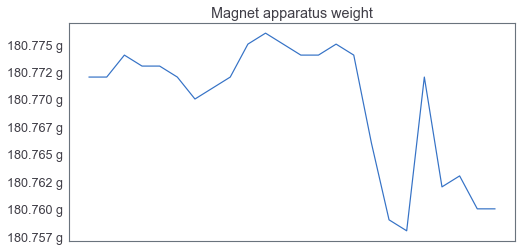

In [23]:
plt.figure(figsize=(8, 4))
plt.plot(data["sample"],data["init"])
plt.title("Magnet apparatus weight")
plt.grid(False)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f g'))
plt.gca().xaxis.set_major_formatter("")
plt.savefig("init_weight.png")
plt.show()


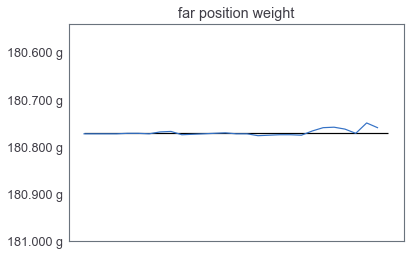

In [24]:
plt.plot(data["sample"][data["sample"] != "5 (second day)"],data["far(g)"][data["sample"] != "5 (second day)"])
plt.ylim(np.mean(data["init"])-(np.mean(data["init"])-np.max(np.abs(data["low(g)"])))/4, np.mean(data["init"])+(np.mean(data["init"])-np.max(np.abs(data["low(g)"])))/4)
plt.hlines(np.mean(data["init"]),0,len(data["sample"][data["sample"] != "5 (second day)"]), "black")
plt.title("far position weight")
plt.grid(False)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f g'))
plt.gca().xaxis.set_major_formatter("")
plt.savefig("far_weight.png")
plt.show()

In [25]:
7.713/3.7

2.0845945945945945

In [26]:
7.749/3.5

2.214

In [27]:
2.0845945945945945/2.214

0.941551307404966

In [28]:
data[["sample","name","mass","height(cm)", "volume",'molar mass',"type","low(g)","high(g)","far(g)","init"]].to_csv("sample_data.csv", index=False)

In [29]:
data.columns

Index(['sample', 'name', 'low(g)', 'high(g)', 'far(g)', 'init',
       'online classification', 'online chi(cm3/mol)', 'height(cm)', 'mass(g)',
       'type', 'molar mass', 'high diff', 'low diff', 'high/low diff diff',
       'high/low diff diff avg', 'our classification', 'mass', 'our chi',
       'diff', 'volume', 'our chi molar', 'percent chi molar diff'],
      dtype='object')